In [1]:
import requests 
import pandas as pd
import numpy 
import seaborn as sns
import matplotlib.pyplot as plt
print("done")

done


In [2]:
# Where is the majoirty of crime occuring?
# What is the most frequent category of offence? 
# Is there a trend in category of offence over time? (time series analysis)

params = {
    'lat': 50.805832,  # Latitude of Portsmouth
    'lng': -1.087222,   # Longitude of Portsmouth  
    'date': '2023-11'
}

response = requests.get("https://data.police.uk/api/crimes-street/all-crime", params=params)
print(response)

<Response [200]>


In [3]:
crime_json = response.json()
df = pd.DataFrame(crime_json)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df.drop(labels=['context', 'persistent_id', 'location_subtype'], axis=1, inplace=True)
df.head()

,category,location_type,location,outcome_status,id,month
0,anti-social-behaviour,Force,"{'latitude': '50.799193', 'street': {'id': 1554345, 'name': 'On or near Surrey Street'}, 'longitude': '-1.090585'}",None,114636927,2023-11
1,anti-social-behaviour,Force,"{'latitude': '50.804435', 'street': {'id': 1555688, 'name': 'On or near Bowler Court'}, 'longitude': '-1.065478'}",None,114638109,2023-11
2,anti-social-behaviour,Force,"{'latitude': '50.810153', 'street': {'id': 1555374, 'name': 'On or near Langley Road'}, 'longitude': '-1.073184'}",None,114640935,2023-11
3,anti-social-behaviour,Force,"{'latitude': '50.799193', 'street': {'id': 1554345, 'name': 'On or near Surrey Street'}, 'longitude': '-1.090585'}",None,114639667,2023-11
4,anti-social-behaviour,Force,"{'latitude': '50.801624', 'street': {'id': 1553862, 'name': 'On or near Cumberland Street'}, 'longitude': '-1.101493'}",None,114669777,2023-11


In [4]:
for row in df:
    print(f"{row}: " + str(df[row].isnull().sum()))

category: 0
location_type: 0
location: 0
outcome_status: 93
id: 0
month: 0


In [5]:
df['id'].duplicated().sum()

0

In [6]:
df['month'].value_counts()

2023-11    981
Name: month, dtype: int64

In [7]:
df.dtypes
df['month'] = pd.to_datetime(df['month'])
df.dtypes

category                  object
location_type             object
location                  object
outcome_status            object
id                         int64
month             datetime64[ns]
dtype: object

In [8]:
outcome_status = []
for row in df['outcome_status']:
    if row is not None:
        outcome_status.append(row['category'])
    else:
        outcome_status.append('None')

df['outcome_status'] = outcome_status
df.sample(10)

,category,location_type,location,outcome_status,id,month
438,shoplifting,Force,"{'latitude': '50.796927', 'street': {'id': 1553780, 'name': 'On or near Victory Road'}, 'longitude': '-1.104648'}",Local resolution,114660953,2023-11-01
199,drugs,Force,"{'latitude': '50.797516', 'street': {'id': 1555364, 'name': 'On or near Thorncroft Road'}, 'longitude': '-1.074115'}",Investigation complete; no suspect identified,114662668,2023-11-01
412,shoplifting,Force,"{'latitude': '50.796716', 'street': {'id': 1554279, 'name': 'On or near Alec Rose Lane'}, 'longitude': '-1.091314'}",Investigation complete; no suspect identified,114654533,2023-11-01
879,violent-crime,Force,"{'latitude': '50.801747', 'street': {'id': 1554542, 'name': 'On or near Jacob's Street'}, 'longitude': '-1.087243'}",Unable to prosecute suspect,114669712,2023-11-01
197,drugs,Force,"{'latitude': '50.796530', 'street': {'id': 1554438, 'name': 'On or near Parking Area'}, 'longitude': '-1.089388'}",Local resolution,114658963,2023-11-01
392,shoplifting,Force,"{'latitude': '50.808133', 'street': {'id': 1555349, 'name': 'On or near Bettesworth Road'}, 'longitude': '-1.073593'}",Investigation complete; no suspect identified,114654409,2023-11-01
15,anti-social-behaviour,Force,"{'latitude': '50.793222', 'street': {'id': 1554620, 'name': 'On or near Worcester Close'}, 'longitude': '-1.086019'}",None,114671361,2023-11-01
648,violent-crime,Force,"{'latitude': '50.805031', 'street': {'id': 1554919, 'name': 'On or near Turner Road'}, 'longitude': '-1.081730'}",Unable to prosecute suspect,114669642,2023-11-01
947,violent-crime,Force,"{'latitude': '50.793618', 'street': {'id': 1554462, 'name': 'On or near Grosvenor Street'}, 'longitude': '-1.088409'}",Status update unavailable,114632116,2023-11-01
36,anti-social-behaviour,Force,"{'latitude': '50.800578', 'street': {'id': 1554507, 'name': 'On or near Parking Area'}, 'longitude': '-1.087209'}",None,114664712,2023-11-01


In [9]:
location = []
for row in df['location']:
    crime_loc = row['street']['name']
    crime_loc = crime_loc.replace('On or near', '')
    location.append(crime_loc)

df['location'] = location
df.sample(10)

,category,location_type,location,outcome_status,id,month
41,anti-social-behaviour,Force,Winston Churchill Avenue,None,114654485,2023-11-01
716,violent-crime,Force,Little George Street,Formal action is not in the public interest,114642302,2023-11-01
774,violent-crime,Force,Parking Area,Unable to prosecute suspect,114646330,2023-11-01
61,anti-social-behaviour,Force,Prince George Street,None,114635000,2023-11-01
489,shoplifting,Force,Moorland Road,Unable to prosecute suspect,114636799,2023-11-01
539,vehicle-crime,Force,Earlsdon Street,Unable to prosecute suspect,114649273,2023-11-01
668,violent-crime,Force,Further/higher Educational Building,Unable to prosecute suspect,114666431,2023-11-01
834,violent-crime,Force,Guildhall Walk,Investigation complete; no suspect identified,114667934,2023-11-01
336,public-order,Force,Havisham Road,Status update unavailable,114671357,2023-11-01
703,violent-crime,Force,Bettesworth Road,Unable to prosecute suspect,114657135,2023-11-01


([0, 1, 2, 3, 4],
 [Text(0, 0, 'violent-crime'),
  Text(1, 0, 'shoplifting'),
  Text(2, 0, 'anti-social-behaviour'),
  Text(3, 0, 'public-order'),
  Text(4, 0, 'vehicle-crime')])

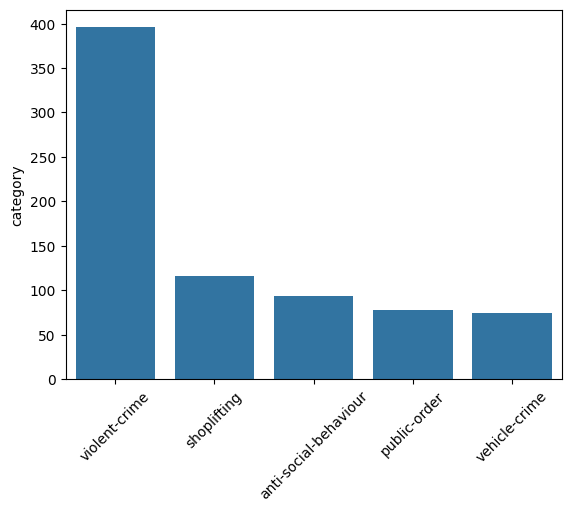

In [10]:
top_5_crime = df['category'].value_counts()[:5]
sns.barplot(top_5_crime)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, ' Parking Area'),
  Text(1, 0, ' Supermarket'),
  Text(2, 0, " Jacob's Street"),
  Text(3, 0, ' Guildhall Walk'),
  Text(4, 0, ' Kingswell Street')])

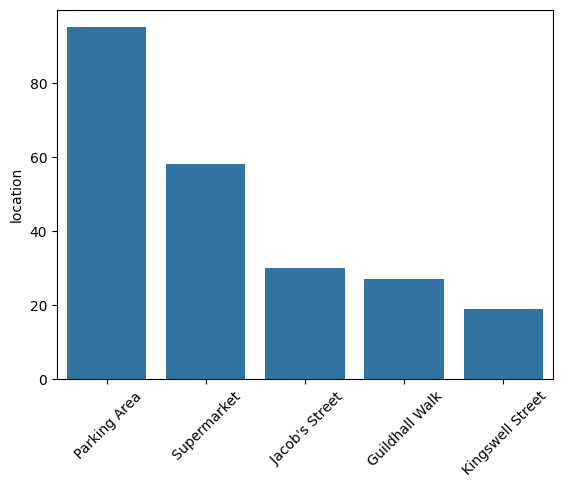

In [11]:
top_5_loc = df['location'].value_counts()[:5]
sns.barplot(top_5_loc)
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'Force'), Text(1, 0, 'BTP')])

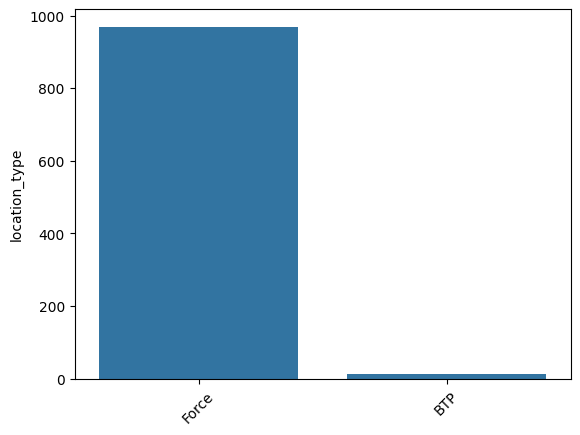

In [12]:
loc_type = df['location_type'].value_counts()
sns.barplot(loc_type)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Investigation complete; no suspect identified'),
  Text(1, 0, 'Unable to prosecute suspect'),
  Text(2, 0, 'Status update unavailable'),
  Text(3, 0, 'None'),
  Text(4, 0, 'Awaiting court outcome')])

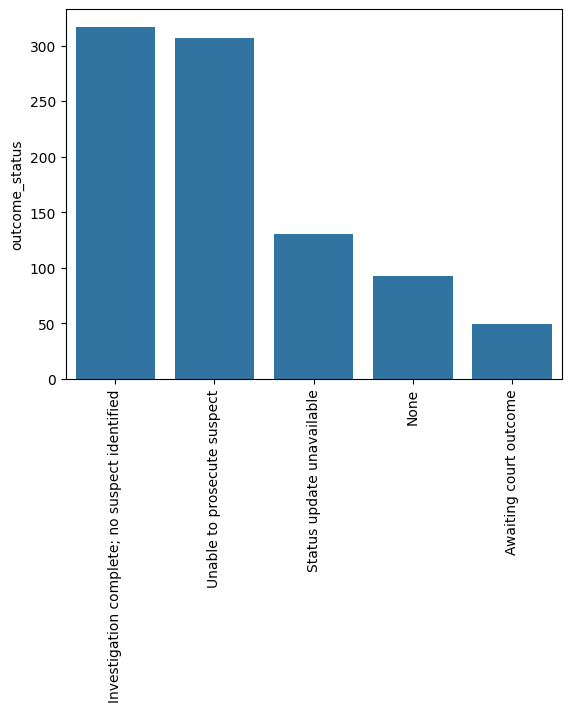

In [13]:
status = df['outcome_status'].value_counts()[:5]
sns.barplot(status)
plt.xticks(rotation=90)

In [14]:
df.shape


(981, 6)

In [15]:
df.to_csv("Crimes_Port_2023_11", index=False)